In [ ]:
!pip install notebook

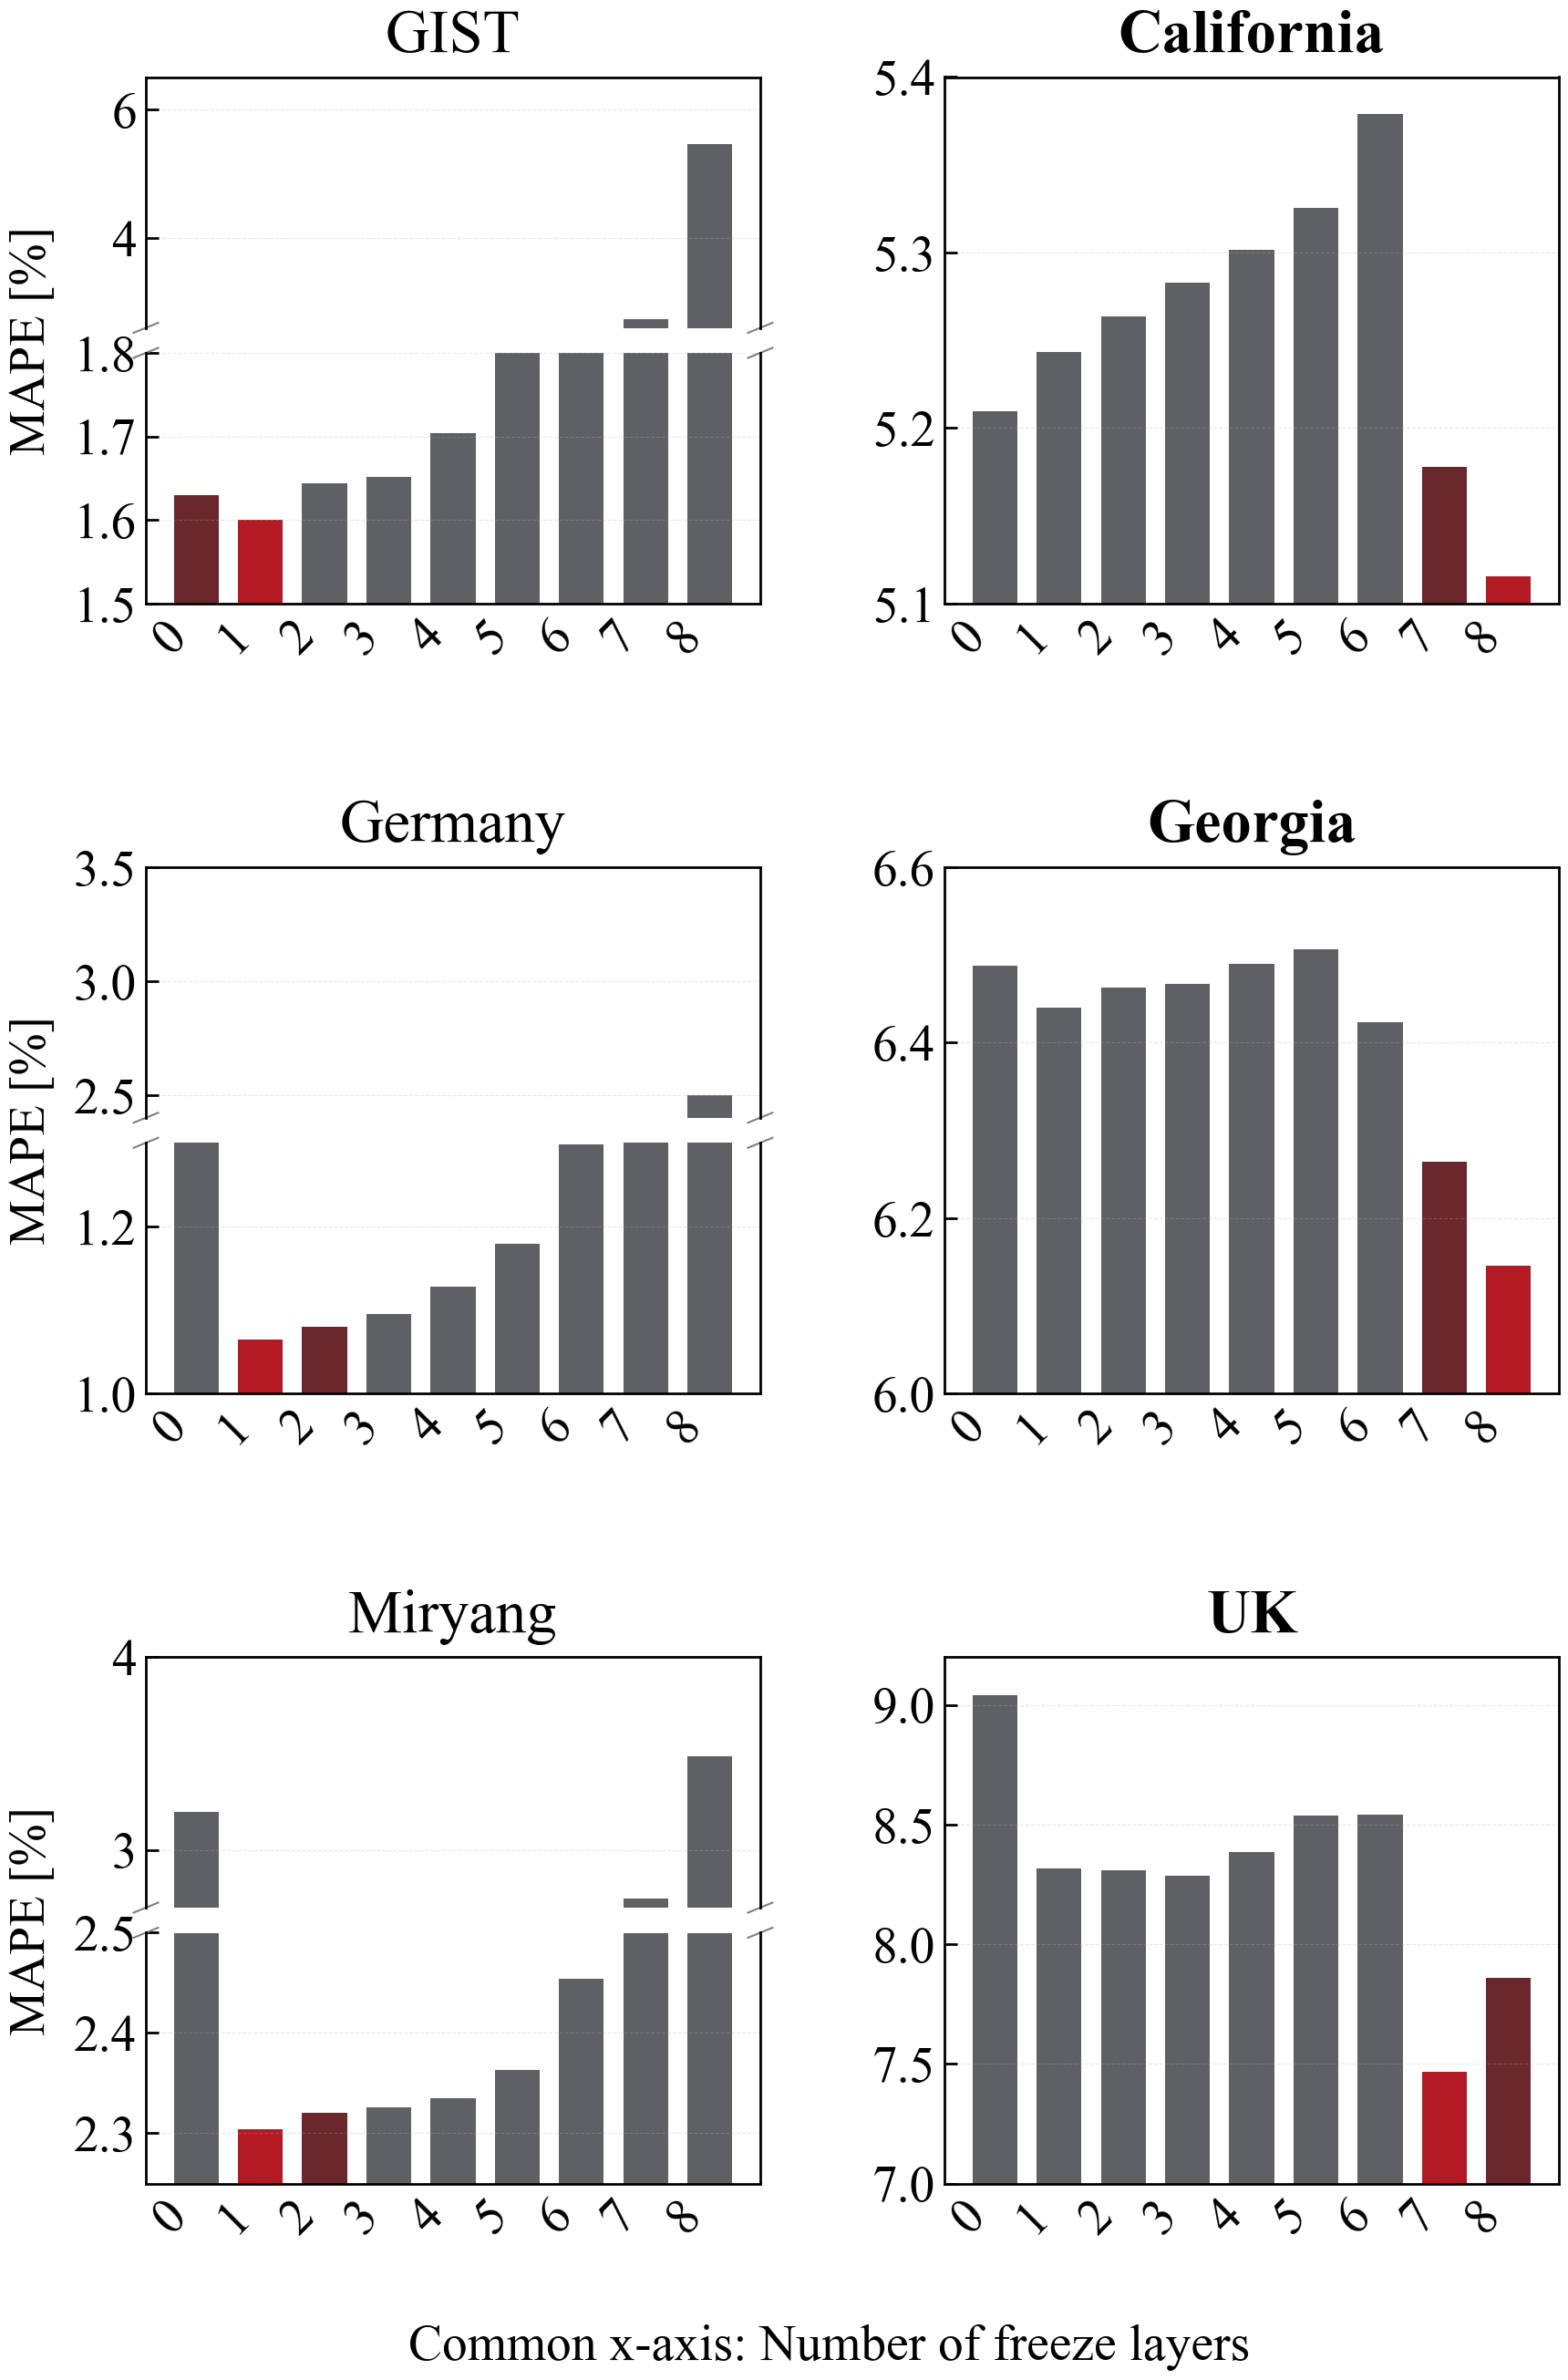

In [41]:

# %%
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
import matplotlib.colors as mcolors



def get_ylabel_position(fig, ax):
    """
    모든 그래프에서 일관된 y축 레이블 위치를 계산합니다.
    """
    fig.canvas.draw()  # 레이아웃 업데이트
    bbox = ax.get_position()
    # 모든 그래프에서 동일한 절대 위치 사용
    return 0.08, bbox.y0 + bbox.height/2
def create_subplot_with_broken_axis(fig, gs, data, title, break_points, y_ranges, show_ylabel=True):
    """
    서브플롯을 생성하고 필요한 경우 축을 끊어서 표현하는 함수
    
    Parameters:
    - fig: matplotlib figure 객체
    - gs: GridSpec 객체
    - data: 그래프에 표시할 데이터
    - title: 서브플롯 제목
    - break_points: 축을 끊을 지점
    - y_ranges: y축의 범위
    - show_ylabel: y축 레이블 표시 여부
    """
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    
    x = np.arange(len(categories))
    width = 0.7
    
    # 최소값을 찾아서 해당 막대만 빨간색으로 표시
    min_idx = np.argmin(data)
    # colors = ['#D3D3D3'] * len(data)  # 기본 색상은 연한 회색
    # colors[min_idx] = '#FF4B4B'  # 최소값은 빨간색
    colors = assign_highlight_colors(data)
    
    # 막대 그래프 그리기
    for i, (value, color) in enumerate(zip(data, colors)):
        ax1.bar(x[i], value, width, color=color)
        ax2.bar(x[i], value, width, color=color)
    
    for spine in ax1.spines.values():
            spine.set_linewidth(2)  # 원하는 굵기로 설정 (예: 2)

    for spine in ax2.spines.values():
            spine.set_linewidth(2)  # 원하는 굵기로 설정 (예: 2)      

    # y축 범위 설정
    ax1.set_ylim(y_ranges[1])
    ax2.set_ylim(y_ranges[0])
    
    # 축이 끊어진 표시 추가
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    # ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False, labelbottom=False, top=False, bottom=False)
    ax1.tick_params(direction='in', length=10, width=2, pad=7)
    # 끊어진 부분 표시
    d = 0.02
    kwargs = dict(transform=ax1.transAxes, color='gray', clip_on=False)
    ax1.plot((-d, +d), (-d, +d), **kwargs)
    ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
    
    kwargs.update(transform=ax2.transAxes)
    ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
    ax2.plot((1-d, 1+d), (1-d, 1+d), **kwargs)
    
    # 제목과 레이블 설정
    # ax1.set_title(title, pad=20, fontweight='bold')
    ax1.set_title(title, pad=20)
    
    # y축 레이블 중앙 정렬
    if show_ylabel:
        # fig.canvas.draw()
        # x_pos, y_pos = get_ylabel_position(fig, ax2)
        x_pos, y_pos = calculate_mape_position(fig, [ax1, ax2])
        fig.text(x_pos, y_pos, 'MAPE [%]', rotation=90, va='center')

        # ax1_pos = ax1.get_position()
        # ax2_pos = ax2.get_position()
        # ylabel_x = ax2_pos.x0 - 0.04
        # ylabel_y = (ax1_pos.y0 + ax1_pos.y1 + ax2_pos.y0 + ax2_pos.y1) / 4
        # fig.text(ylabel_x, ylabel_y, 'MAPE', rotation=90, va='center')
    
    # x축 설정
    ax2.set_xticks(x)
    ax2.tick_params(axis='x', which='both', bottom=False, top=False)
    ax2.set_xticklabels(categories, rotation=45, ha='right')
    ax2.tick_params(direction='in', length=10, width=2, pad=7)
    # 그리드 추가
    ax1.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    ax2.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
    
    # # 불필요한 테두리 제거
    # ax1.spines['top'].set_visible(False)
    # ax1.spines['right'].set_visible(False)
    # ax2.spines['right'].set_visible(False)

def calculate_mape_position(fig, axes):
    """
    MAPE 레이블의 적절한 위치를 계산합니다.
    
    Parameters:
    - fig: matplotlib figure 객체
    - axes: 하나의 축 또는 두 개의 축(끊어진 그래프의 경우) 리스트
    
    Returns:
    - x_pos: MAPE 레이블의 x 좌표
    - y_pos: MAPE 레이블의 y 좌표
    """
    fig.canvas.draw()  # 레이아웃 업데이트를 위해 필요
    
    if isinstance(axes, list):  # 끊어진 그래프의 경우
        ax1, ax2 = axes
        bbox1 = ax1.get_position()
        bbox2 = ax2.get_position()
        # y 위치는 두 축의 중간점
        y_pos = (bbox1.y0 + bbox1.y1 + bbox2.y0 + bbox2.y1) / 4
    else:  # 일반 그래프의 경우
        bbox = axes.get_position()
        # y 위치는 축의 중간점
        y_pos = bbox.y0 + bbox.height / 2
    
    # 모든 그래프에 대해 동일한 x 위치 사용
    x_pos = 0.05  # 이 값은 필요에 따라 조정 가능
    
    return x_pos, y_pos

def assign_highlight_colors(data):
    """
    데이터에서 가장 낮은 값과 두 번째로 낮은 값을 찾아 색상을 할당합니다.
    
    Parameters:
    - data: 수치 데이터 리스트
    
    Returns:
    - colors: 각 데이터 포인트에 대한 색상 리스트
    """
    # 데이터를 정렬하여 가장 작은 값과 두 번째로 작은 값의 인덱스를 찾습니다
    sorted_indices = np.argsort(data)
    min_idx = sorted_indices[0]
    second_min_idx = sorted_indices[1]
    
    # 기본 색상은 매우 연한 회색
    colors = ['#5E6064'] * len(data)  
    # 두 번째로 작은 값은 연한 파란색
    colors[second_min_idx] = '#6A282C' #'#ADBED3' #'#90CAF9'  
    # 가장 작은 값은 진한 파란색
    colors[min_idx] = '#B31A23'#'#103B58' #'#2196F3'  
    
    return colors
# 데이터 정의
categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8']#, 'zero-shot']
data = {
    'GIST': [1.6293, 1.6008, 1.6438, 1.6514, 1.7037, 1.8012, 2.0653, 2.7289, 5.4627],#, 6.127],
    'Germany': [1.466, 1.0643, 1.0794, 1.0956, 1.1274, 1.1795, 1.298, 1.5509, 2.4999],#, 3.2284],
    'Miryang': [3.1986, 2.3044, 2.3204, 2.3256, 2.3348, 2.3628, 2.4544, 2.7459, 3.4867],#, 3.7475],
    'California': [5.2096, 5.2434, 5.2638, 5.2827, 5.3013, 5.3254, 5.3791, 5.1777, 5.1154],#, 5.2956],
    'Georgia': [6.4877, 6.4395, 6.463, 6.4671, 6.49, 6.506, 6.4227, 6.2644, 6.1461],#, 6.1932],
    'UK': [9.0415, 8.3173, 8.308, 8.2876, 8.3863, 8.5353, 8.5398, 7.4664, 7.8598]#, 8.6286]
}

# 그래프 설정
plot_settings = {
    'GIST': {
        'break_points': [1.8, 2.6],
        'y_ranges': [(1.5, 1.8), (2.6, 6.5)]
    },
    'Germany': {
        'break_points': [1.3, 2.4],
        'y_ranges': [(1.0, 1.3), (2.4, 3.5)]
    },
    'Miryang': {
        'break_points': [2.5, 2.7],
        'y_ranges': [(2.25, 2.5), (2.7, 4.0)]
    },
    'California': {
        'break_points': None,
        'y_ranges': [(5.1, 5.4)]
    },
    'Georgia': {
        'break_points': None,
        'y_ranges': [(6.0, 6.6)]
    },
    'UK': {
        'break_points': None,
        'y_ranges': [(7, 9.2)]
    }
}

# 그래프 순서 정의
# plot_order = ['GIST', 'Germany', 'Miryang', 'California', 'Georgia', 'UK']
plot_order = ['GIST', 'California', 'Germany', 'Georgia', 'Miryang', 'UK']

# 플롯 스타일 설정
plt.style.use('default')
# plt.rcParams.update({
#     'font.size': 10,
#     'axes.labelsize': 11,
#     'axes.titlesize': 11,
#     'xtick.labelsize': 10,
#     'ytick.labelsize': 10
# })

plt.rcParams['font.size'] = 40
plt.rcParams['font.family'] = 'Times New Roman'

# 메인 figure 생성
fig = plt.figure(figsize=(20, 30))
outer_grid = gridspec.GridSpec(3, 2, figure=fig, hspace=0.5, wspace=0.3)

# 서브플롯 생성
for idx, region in enumerate(plot_order):
    settings = plot_settings[region]
    values = data[region]
    show_ylabel = idx % 2 == 0  # 왼쪽 열에만 y축 레이블 표시
    
    if settings['break_points']:
        inner_grid = gridspec.GridSpecFromSubplotSpec(2, 1,
                                                    subplot_spec=outer_grid[idx],
                                                    height_ratios=[1, 1],
                                                    hspace=0.1)
        create_subplot_with_broken_axis(fig, inner_grid, values, region,
                                      settings['break_points'],
                                      settings['y_ranges'],
                                      show_ylabel)
    else:
        ax = fig.add_subplot(outer_grid[idx])
        
        # 최소값 강조
        min_idx = np.argmin(values)
        # colors = ['#D3D3D3'] * len(values)
        # colors[min_idx] = '#FF4B4B'
        colors = assign_highlight_colors(values)
        
        x = np.arange(len(categories))
        for i, (value, color) in enumerate(zip(values, colors)):
            ax.bar(x[i], value, width=0.7, color=color)
        # 사각변 굵기 조정
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # 원하는 굵기로 설정 (예: 2)

        ax.set_title(region, pad=20, fontweight='bold')
        if show_ylabel:
            x_pos, y_pos = calculate_mape_position(fig, ax)
            fig.text(x_pos, y_pos, 'MAPE [%]', rotation=90, va='center')
            # ax.yaxis.set_label_coords(-0.1, 0.5)
            # ax.set_ylabel('MAPE')
        
        ax.set_xticks(x)
        ax.set_xticklabels(categories, rotation=45, ha='right')
       
        ax.tick_params(direction='in', length=10, width=2, pad=7)
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        ax.set_ylim(settings['y_ranges'][0])
        ax.yaxis.grid(True, linestyle='--', alpha=0.3, zorder=0)
        # ax.spines['top'].set_visible(False)
        # ax.spines['right'].set_visible(False)



fig.text(
    0.5, 0.05,  
    'Common x-axis: Number of freeze layers',
    ha='center',
    va='center',
    fontsize=40
)

plt.show()
# 저장
# plt.savefig('region_metrics_updated.pdf', bbox_inches='tight', dpi=300)
# plt.savefig('2.png', bbox_inches='tight', dpi=300)
# plt.close()
# %%


In [1]:
import plotly.graph_objects as go

# Sample data
sites = ["GIST", "Konstanz", "Miryang", "California", "Georgia", "UK"]
methods = ["Fine-Tuning", "Linear Probing", "Zero-Shot", "Target-Only"]
data = [
    [1.6008, 5.3760, 6.1270, 2.1434],  # GIST
    [1.0643, 2.4999, 3.2284, 1.4745],  # Konstanz
    [2.3044, 3.4867, 3.7475, 3.1991],  # Miryang
    [5.1154, 5.1154, 5.2956, 5.2644],  # California
    [6.1461, 6.1396, 6.1932, 6.6276],  # Georgia
    [7.4664, 7.8598, 8.6286, 9.0415]   # UK
]

# Custom colors and patterns
method_colors = [
    "rgb(179, 26, 35)",     # Adrenaline Rush for Fine-Tuning
    "rgb(117, 81, 57)",     # Toffee for Linear Probing
    "rgb(92, 44, 53)",      # Tawny Port for Zero-Shot
    "rgb(16, 59, 88)"       # Blue Opal for Target-Only
]
method_patterns = ["", "/", "\\", "."]  # No pattern, diagonal stripe, reverse diagonal, dotted

# Initialize figure
fig = go.Figure()

# Add bars with patterns
for i, method in enumerate(methods):
    fig.add_trace(go.Bar(
        x=sites,
        y=[row[i] for row in data],
        name=method,
        marker=dict(
            color=method_colors[i],
            pattern_shape=method_patterns[i],
            pattern_size=6  # Smaller pattern size
        )
    ))

# Update layout
fig.update_layout(
    xaxis=dict(
        title="Site Name",
        titlefont=dict(family="Times New Roman", size=26),
        tickfont=dict(family="Times New Roman", size=22),
        showline=True,  # Add border line to x-axis
        linewidth=2,
        linecolor="black",
        mirror=True  # Add top border
    ),
    yaxis=dict(
        title="MAPE [%]",
        titlefont=dict(family="Times New Roman", size=26),
        tickfont=dict(family="Times New Roman", size=22),
        showline=True,  # Add border line to y-axis
        linewidth=2,
        linecolor="black",
        ticks="inside",  # Add ticks inside the graph
        tickwidth=2,
        tickcolor="black",
        tickmode="array",  # Use custom tick values
        tickvals=[1, 3, 5, 7, 9],  # Specify tick positions
        ticktext=["1", "3", "5", "7", "9"],  # Tick labels
        mirror=True,  # Add right border
    ),
    legend=dict(
        font=dict(family="Times New Roman", size=22),  # Legend font
        bordercolor="black",  # Add border around legend
        borderwidth=2,
        x=0.15,  # Position legend inside the graph
        y=0.98,
        xanchor="left",
        yanchor="top",
        bgcolor="white"  # Background color for legend box
    ),
    barmode="group",
    template="plotly_white",
    width=900,
    height=500
)

# Add outer border to the entire graph
fig.update_layout(
    margin=dict(l=50, r=50, t=70, b=50),
    paper_bgcolor="white",
    plot_bgcolor="white",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"  # 전체 글씨를 검은색으로 설정
    )
)

fig.show()


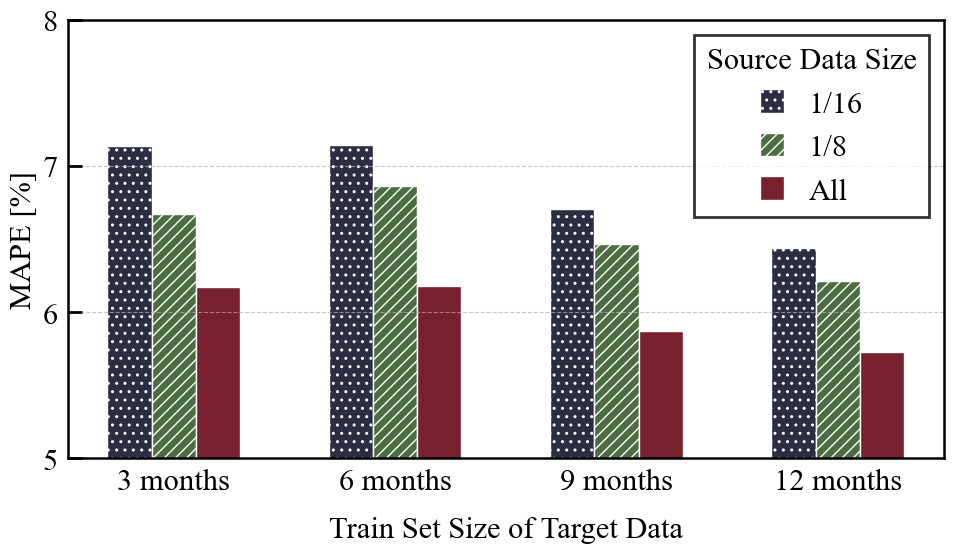

In [45]:
import matplotlib.pyplot as plt
import numpy as np



# Data
months = ['3 months', '6 months', '9 months', '12 months']
data_1_16 = [7.1363, 7.1455, 6.7053, 6.4413]
data_1_8 = [6.6736, 6.8629, 6.468, 6.2141]
data_entire = [6.1724, 6.1783, 5.8742, 5.7292]

# Set width of each bar and positions of bars
width = 0.2
x = np.arange(len(months))

# Create figure and axis
plt.figure(figsize=(10, 6))
plt.style.use('default')
plt.rcParams['font.size'] = 22  
plt.rcParams['font.family'] = 'Times New Roman'

# 패턴 크기 조절
plt.rcParams['hatch.linewidth'] = 1  # 패턴의 선 두께
plt.rcParams['hatch.color'] = 'white'  # 패턴 색상
# plt.rcParams['hatch.density'] = 4  # 점의 밀도 - 값이 클수록 더 조밀

plt.bar(x - width, data_1_16, width, label='1/16', color='#2B2E43',     #D6C69A #BEBDBD #2B2E43
        hatch='..', edgecolor='white')  # 점 패턴
plt.bar(x, data_1_8, width, label='1/8', color='#4B6D41',       #595F34 #103B58 #4B6D41
        hatch='///', edgecolor='white')  # 대각선 패턴
plt.bar(x + width, data_entire, width, label='All', color='#77202E', #282D3C #B31A23 #77202E
        edgecolor='white')

# Customize plot
plt.ylabel('MAPE [%]')
plt.xlabel('Train Set Size of Target Data', labelpad=15)
# plt.title('GIST')
plt.xticks(x, months)
plt.tick_params(axis='y', direction='in', length=10, width=2, pad=7)
plt.tick_params(axis='x', bottom=False)

# Modify legend to use square markers
legend=plt.legend(title='Source Data Size',
          handlelength=0.8,  # 범례 마커 길이 조정
          handleheight=0.8,  # 범례 마커 높이 조정
          edgecolor='black',
          fancybox=False)  # 범례 상자를 직각으로 설정
legend.get_frame().set_linewidth(2)     # 범례 박스의 외곽선 두께 조절

# Set y-axis limits
plt.ylim(5, 8)
plt.yticks(np.arange(5, 9, 1))

# Add grid
plt.grid(True, axis='y', linestyle='--', alpha=0.7, zorder=0)

# Set spines linewidth (변의 굵기 조정)
ax = plt.gca()  # Get current axis
for spine in ax.spines.values():
    spine.set_linewidth(1.8)  # 원하는 굵기 설정 (예: 2)

# Adjust layout
plt.tight_layout()

# Save plots
plt.show()

In [44]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Data setup
sites = ["GIST", "Konstanz", "Miryang", "California", "Georgia", "UK"]
x_labels = ["3", "6", "9", "12"]
x_labels_UK = ["3", "6", "9"]
# y_labels = ["1/16 ", "1/8 ", "All "]
y_labels = ["All ", "1/8 ", "1/16 "]  # Change

data = {
    # "GIST":     [[7.1363, 7.1455, 6.7053, 6.4413],
    #              [6.6736, 6.8629, 6.4680, 6.2141],
    #              [6.1724, 6.1783, 5.8742, 5.7292]],

    # "Konstanz": [[3.8336, 3.7963, 3.7823, 3.7371],
    #              [3.3241, 3.2975, 3.2998, 3.3247],
    #              [3.3888, 3.2131, 3.3475, 3.0605]],

    # "Miryang":  [[4.3548, 3.8478, 3.5435, 3.2797],
    #              [4.0321, 3.6522, 3.3389, 3.0737],
    #              [3.6815, 3.3182, 2.9681, 2.7572]],

    # "California": [[6.3624, 5.5923, 5.2748, 5.2427],
    #                [5.8545, 5.4798, 4.9797, 5.0834],
    #                [5.411, 5.2759, 4.8947, 4.9451]],

    # "Georgia":  [[7.5237, 7.3936, 6.3121, 6.4992],
    #              [6.6001, 6.1299, 6.0094, 6.1892],
    #              [6.4423, 6.1232, 5.8519, 5.8817]],

    # "UK":       [[8.2501, 9.7039, 8.8634],
    #              [8.2529, 10.478, 8.2393],
    #              [7.4676, 8.5057, 7.6623]]

    "GIST":     [[6.1724, 6.1783, 5.8742, 5.7292],
                 [6.6736, 6.8629, 6.4680, 6.2141],
                 [7.1363, 7.1455, 6.7053, 6.4413]],

    "Konstanz": [[3.3888, 3.2131, 3.3475, 3.0605],
                 [3.3241, 3.2975, 3.2998, 3.3247],
                 [3.8336, 3.7963, 3.7823, 3.7371],],

    "Miryang":  [[3.6815, 3.3182, 2.9681, 2.7572],
                 [4.0321, 3.6522, 3.3389, 3.0737],
                 [4.3548, 3.8478, 3.5435, 3.2797],],

    "California": [[5.411, 5.2759, 4.8947, 4.9451],
                   [5.8545, 5.4798, 4.9797, 5.0834],
                   [6.3624, 5.5923, 5.2748, 5.2427],],

    "Georgia":  [[6.4423, 6.1232, 5.8519, 5.8817],
                 [6.6001, 6.1299, 6.0094, 6.1892],
                 [7.5237, 7.3936, 6.3121, 6.4992],],

    "UK":       [[7.4676, 8.5057, 7.6623],
                 [8.2529, 10.478, 8.2393],
                 [8.2501, 9.7039, 8.8634],]
}
# print(data["GIST"])


# Create figure with 2x3 subplots
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=sites,
    horizontal_spacing=0.12,  # Increased spacing more
    vertical_spacing=0.15
)

# Calculate colorbar positions - adjusted for more even spacing
colorbar_x = [0.25, 0.623, 0.996]  # Adjusted x positions


print("y_labels:", y_labels)
print("data for GIST:")
for row in data["GIST"]:
    print(row)

# Add heatmaps
for idx, site in enumerate(sites):
    row = idx // 3 + 1
    col = idx % 3 + 1
    
    # Get min and max values for this site's data
    site_data = np.array(data[site])
    site_min = np.nanmin(site_data[site_data != None])
    site_max = np.nanmax(site_data[site_data != None])

    # Set colorbar title based on site
    colorbar_title = 'MAPE' if site == 'GIST' else None
    x_labels = x_labels_UK if site == 'UK' else x_labels
    
    custom_colorscale = [
    (0.0, "rgb(16, 59, 88)"),       # Blue Opal 16 59 88
    (0.66, "rgb(106, 40, 44)"),     # Syrah 106 40 44
    (1.0, "rgb(179, 26, 35)")       # Adrenaline Rush 179 26 35
]
    
    # Add heatmaps 부분을 다음과 같이 수정:
    fig.add_trace(
        go.Heatmap(
            z=data[site],
            x=x_labels,
            y=y_labels,
            # colorscale='Viridis', # Cividis, ylorrd
            # colorscale='oryel',  # Change colorscale
            colorscale=custom_colorscale,  # Change colorscale
            reversescale=True,  # 색상 순서를 반전
            text=[[f'{val:.2f}' if val is not None else '' for val in row] for row in data[site]],
            texttemplate='%{text}',
            textfont={"size": 15, "color": "white", "family": "Times New Roman"},
            showscale=True,
            colorbar=dict(
                title=dict(
                    text=colorbar_title if colorbar_title else '',
                    font=dict(
                        family="Times New Roman",
                        size=15,
                    ),
                ),
                x=colorbar_x[col-1],
                y=0.99 if row == 1 else 0.41,  # y 위치를 더 위로 올림
                len=0.4,  # colorbar 길이를 줄임
                thickness=25,
                yanchor='top',
                tickmode='array',
                # tickvals=[site_min, (site_min + site_max)/2, site_max],
                # ticktext=[f'{site_min:.2f}', f'{(site_min + site_max)/2:.2f}', f'{site_max:.2f}'],
                tickvals=[site_max, (site_min + site_max)/2, site_min],
                ticktext=[f'{site_max:.2f}', f'{(site_min + site_max)/2:.2f}', f'{site_min:.2f}'],
                tickfont=dict(family="Times New Roman", size=14),
                # autorange="reversed"  # colorbar 값 순서 반전
            ),
            # zmin=site_min,
            # zmax=site_max
            zmin=site_max,
            zmax=site_min
        ),
        row=row, col=col
    )

# Update layout
fig.update_layout(
    height=800,
    width=1200,
    # title_text='Source Data Volume vs Target Data Length Heatmaps',
    title_x=0.5,
    showlegend=False,
    margin=dict(t=80, b=40),
        title_font=dict(
        family="Times New Roman",
        size=18,
        color="black"  # 제목 글씨를 검은색으로 설정
        ),
    font=dict(
        family="Times New Roman",
        size=14,
        color="black"  # 전체 글씨를 검은색으로 설정
    )
)

# subplot titles 글꼴 크기도 조정
for annotation in fig.layout.annotations:
    annotation.font.update(
        family='Times New Roman',
        size=20  # subplot title 글씨 크기
    )

for row in range(1, 3):  # 2행
    for col in range(1, 4):  # 3열
        fig.update_xaxes(
            tickfont=dict(size=16, family="Times New Roman"),  # x축 눈금 레이블 크기
            row=row, col=col
        )
        fig.update_yaxes(
            tickfont=dict(size=16, family="Times New Roman"),  # y축 눈금 레이블 크기
            row=row, col=col
        )

# Add axis labels only to the leftmost plots
i=1
row = (i-1)//3 + 1
col = (i-1)%3 + 1
fig.update_xaxes(
    title_text='Target Dataset Length [Months]',
    title_font=dict(size=18, family="Times New Roman"),
    row=row, col=col
)
fig.update_yaxes(
    title_text='Source Dataset Volume',
    title_font=dict(size=18, family="Times New Roman"),
    row=row, col=col
)

# subplot 제목 글씨체도 변경
for annotation in fig.layout.annotations:
    annotation.font.family = 'Times New Roman'

# Show figure
fig.show()

y_labels: ['All ', '1/8 ', '1/16 ']
data for GIST:
[6.1724, 6.1783, 5.8742, 5.7292]
[6.6736, 6.8629, 6.468, 6.2141]
[7.1363, 7.1455, 6.7053, 6.4413]
